- 1つのファイルから複数の特徴量を抽出するのが望ましい
- パワースペクトルの時間変化＝パワースペクトルグラム
  - これを取得するために3次元フーリエ変換

In [3]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy import fftpack

縦軸が周波数、横軸が周波数、Z軸が音声の大きさ
高音
低音


array([[1.3019793e-01, 9.7582355e-02, 3.7678465e-02, ..., 2.3810077e-02,
        6.3302308e-02, 1.3986437e-01],
       [2.4180211e-02, 5.0712910e-02, 2.6232313e-02, ..., 4.9278505e-02,
        5.8648083e-02, 1.4638990e-01],
       [2.3252369e-01, 9.1375470e-02, 2.9562151e-02, ..., 1.1239504e-01,
        5.3783253e-02, 1.6942939e-01],
       ...,
       [5.6914250e-06, 3.5127382e-06, 1.4921800e-06, ..., 1.8844106e-07,
        1.0856669e-04, 2.7062438e-04],
       [5.8638266e-06, 3.0794529e-06, 1.2160980e-06, ..., 2.0286495e-07,
        1.0917694e-04, 2.7122570e-04],
       [5.2547616e-06, 2.3356913e-06, 4.7362460e-07, ..., 4.0088125e-08,
        1.0943411e-04, 2.7168277e-04]], dtype=float32)

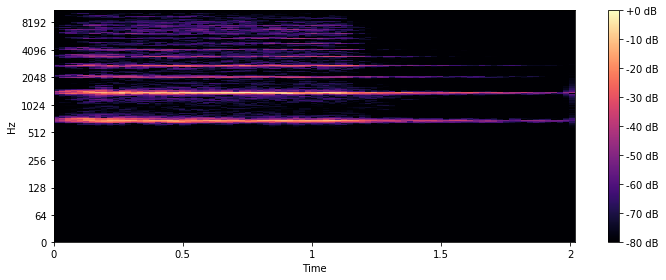

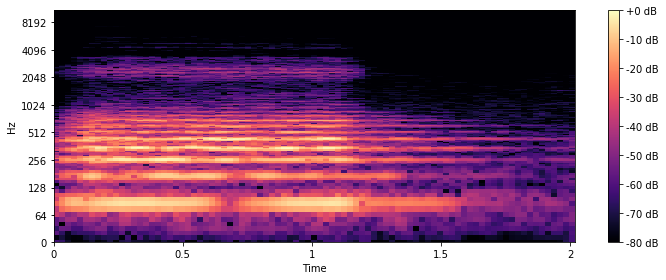

In [7]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    y = np.abs(librosa.stft(a))
    plt.figure(figsize=(10,4))
    librosa.display.specshow(librosa.amplitude_to_db(y, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    return y

# data_X, data_y = get_data('voiceset')
print('縦軸が周波数、横軸が周波数、Z軸が音声の大きさ')
print('高音')
get_feat('sample/hi.wav')
print('低音')
get_feat('sample/lo.wav')

In [9]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    y = np.abs(librosa.stft(a))
    return y

def get_data(dir_name):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path=dir_name)):
        print("read: {}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker], file_name))
    
    return (data_X, data_y)

print('縦軸が周波数、横軸が周波数、Z軸が音声の大きさ')
data_X, data_y = get_data('voiceset')

縦軸が周波数、横軸が周波数、Z軸が音声の大きさ
read: belevskaya_06_su.wav
read: belevskaya_07_su.wav
read: belevskaya_b01.wav
read: belevskaya_b02.wav
read: belevskaya_b03.wav
read: belevskaya_b04.wav
read: belevskaya_b05.wav
read: belevskaya_b06.wav
read: belevskaya_b07.wav
read: belevskaya_b08_su.wav
read: belevskaya_b09_su.wav
read: belevskaya_b10.wav
read: belevskaya_b11.wav
read: belevskaya_b12.wav
read: belevskaya_b13.wav
read: belevskaya_b14.wav
read: belevskaya_b15.wav
read: belevskaya_b16.wav
read: belevskaya_b17.wav
read: kirishima_04_su.wav
read: kirishima_b01.wav
read: kirishima_b02_su.wav
read: kirishima_b03.wav
read: kirishima_b04.wav
read: kirishima_b05.wav
read: kirishima_b06.wav
read: kirishima_b07.wav
read: kirishima_c01.wav
read: kirishima_c02.wav
read: kirishima_c03.wav
read: kirishima_c04.wav
read: kirishima_c05.wav
read: kirishima_c06.wav
read: kirishima_c07.wav
read: kirishima_c08.wav
read: kirishima_c09.wav
read: suzutsuki_b01.wav
read: suzutsuki_b02.wav
read: suzutsuki_b03.wav
read: 

In [11]:
# 教師データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=11813)
print("{} -> {}, {}".format(len(data_X), len(train_X), len(test_X)))

48 -> 36, 12


In [14]:
# 各時間に対応する成分をそれぞれ1つの特徴量として分割する
def split_feat(data_X, data_y):
    data_X2 = []
    data_y2 = []
    for X, y in zip(data_X, data_y):
        X2 = X.T
        y2 = np.array([y[0]] * X.shape[1])
        data_X2.append(X2)
        data_y2.append(y2)
    data_X2 = np.concatenate(data_X2)
    data_y2 = np.concatenate(data_y2)
    return (data_X2, data_y2)

train_X2, train_y2 = split_feat(train_X, train_y)

clf = svm.SVC(gamma=0.0001, C=1)
clf.fit(train_X2, train_y2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
def predict(X):
    result = clf.predict(X.T)
    return np.argmax(np.bincount(result))

ok_count = 0

for X, y in zip(test_X, test_y):
    actual = predict(X)
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

o file: suzutsuki_b06.wav, actual: 1, expected: 1
x file: kirishima_04_su.wav, actual: 2, expected: 0
o file: kirishima_c01.wav, actual: 0, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
o file: belevskaya_b14.wav, actual: 2, expected: 2
x file: kirishima_b04.wav, actual: 2, expected: 0
o file: suzutsuki_b08.wav, actual: 1, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
o file: suzutsuki_b03.wav, actual: 1, expected: 1
o file: belevskaya_b10.wav, actual: 2, expected: 2
x file: kirishima_b01.wav, actual: 2, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
9/12


話者認識には、メル周波数ケプストラム係数（MFCC）が有効と言われている

In [17]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    y = librosa.feature.mfcc(y=a, sr=sr)
    return y

def get_data(dir_name):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path=dir_name)):
        print("read: {}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker], file_name))
    
    return (data_X, data_y)

print('縦軸が周波数、横軸が周波数、Z軸が音声の大きさ')
data_X, data_y = get_data('voiceset')

縦軸が周波数、横軸が周波数、Z軸が音声の大きさ
read: belevskaya_06_su.wav
read: belevskaya_07_su.wav
read: belevskaya_b01.wav
read: belevskaya_b02.wav
read: belevskaya_b03.wav
read: belevskaya_b04.wav
read: belevskaya_b05.wav
read: belevskaya_b06.wav
read: belevskaya_b07.wav
read: belevskaya_b08_su.wav
read: belevskaya_b09_su.wav
read: belevskaya_b10.wav
read: belevskaya_b11.wav
read: belevskaya_b12.wav
read: belevskaya_b13.wav
read: belevskaya_b14.wav
read: belevskaya_b15.wav
read: belevskaya_b16.wav
read: belevskaya_b17.wav
read: kirishima_04_su.wav
read: kirishima_b01.wav
read: kirishima_b02_su.wav
read: kirishima_b03.wav
read: kirishima_b04.wav
read: kirishima_b05.wav
read: kirishima_b06.wav
read: kirishima_b07.wav
read: kirishima_c01.wav
read: kirishima_c02.wav
read: kirishima_c03.wav
read: kirishima_c04.wav
read: kirishima_c05.wav
read: kirishima_c06.wav
read: kirishima_c07.wav
read: kirishima_c08.wav
read: kirishima_c09.wav
read: suzutsuki_b01.wav
read: suzutsuki_b02.wav
read: suzutsuki_b03.wav
read: 

In [18]:
# 教師データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=11813)
print("{} -> {}, {}".format(len(data_X), len(train_X), len(test_X)))

48 -> 36, 12


In [19]:
# 各時間に対応する成分をそれぞれ1つの特徴量として分割する
def split_feat(data_X, data_y):
    data_X2 = []
    data_y2 = []
    for X, y in zip(data_X, data_y):
        X2 = X.T
        y2 = np.array([y[0]] * X.shape[1])
        data_X2.append(X2)
        data_y2.append(y2)
    data_X2 = np.concatenate(data_X2)
    data_y2 = np.concatenate(data_y2)
    return (data_X2, data_y2)

train_X2, train_y2 = split_feat(train_X, train_y)

clf = svm.SVC(gamma=0.0001, C=1)
clf.fit(train_X2, train_y2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
def predict(X):
    result = clf.predict(X.T)
    return np.argmax(np.bincount(result))

ok_count = 0

for X, y in zip(test_X, test_y):
    actual = predict(X)
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

o file: suzutsuki_b06.wav, actual: 1, expected: 1
o file: kirishima_04_su.wav, actual: 0, expected: 0
o file: kirishima_c01.wav, actual: 0, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
o file: belevskaya_b14.wav, actual: 2, expected: 2
o file: kirishima_b04.wav, actual: 0, expected: 0
o file: suzutsuki_b08.wav, actual: 1, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
o file: suzutsuki_b03.wav, actual: 1, expected: 1
o file: belevskaya_b10.wav, actual: 2, expected: 2
o file: kirishima_b01.wav, actual: 0, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
12/12


kirishima


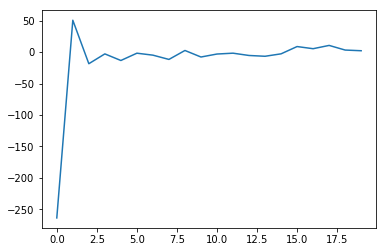

suzutsuki


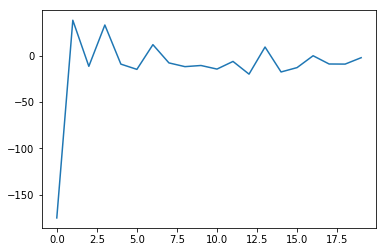

belevskaya


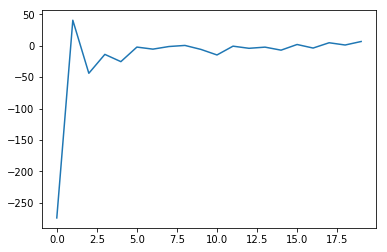

hi


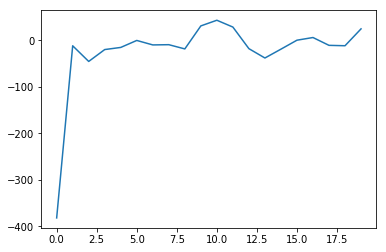

lo


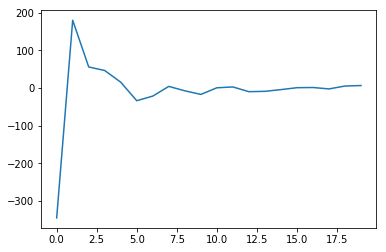

In [23]:
# mfcc を描画する
def mean_plot(mfccs, name):
    print(name)
    mean = np.mean(mfccs.T, axis=0)
    plt.plot(range(0, len(mean)), mean)
    plt.show()

mean_plot(get_feat("voiceset/kirishima_b01.wav"), "kirishima")
mean_plot(get_feat("voiceset/suzutsuki_b01.wav"), "suzutsuki")
mean_plot(get_feat("voiceset/belevskaya_b01.wav"), "belevskaya")
mean_plot(get_feat("sample/hi.wav"), "hi")
mean_plot(get_feat("sample/lo.wav"), "lo")